<h1 align=center>Capítulo 5: Trabalhando com vetores de palavras e semelhança semântica</h1>
<p align=center><img src=https://s5.static.brasilescola.uol.com.br/be/2021/09/semiotica.jpg width=500><p>

Os vetores de palavras (Word Vectors) são ferramentas úteis e têm sido o tema quente da NLP por quase uma década. Um vetor de palavras é basicamente uma representação densa de uma palavra. O que é surpreendente sobre esses vetores é que palavras semanticamente semelhantes têm vetores de palavras semelhantes. Os vetores de palavras são ótimos para aplicativos de semelhança semântica, como calcular a semelhança entre palavras, frases, sentenças e documentos. No nível das palavras, os vetores de palavras fornecem informações sobre sinonímia, analogias semânticas e muito mais. Podemos construir aplicações de similaridade semântica usando vetores de palavras.

Os vetores de palavras são produzidos por algoritmos que fazem uso do fato de que palavras semelhantes aparecem em contextos semelhantes. Para capturar o significado de uma palavra, um algoritmo de vetor de palavras coleta informações sobre as palavras ao redor com as quais a palavra-alvo aparece. Este paradigma de capturar semântica para palavras por suas palavras circundantes é chamado de **semântica distributiva**.

Neste capítulo, apresentaremos o **paradigma da semântica distribucional** e seus **métodos de similaridade semântica** associados. Começaremos dando uma olhada conceitual na **vetorização de texto** para que você saiba quais problemas de NLP os vetores de palavras resolvem.

Em seguida, nos familiarizaremos com cálculos de vetores de palavras, como **cálculo de distância**, **cálculos de analogia** e **visualização**. Em seguida, aprenderemos como nos beneficiar dos vetores de palavras pré-treinados do spaCy, bem como importar e usar vetores de terceiros. Por fim, passaremos por métodos avançados de similaridade semântica usando spaCy.

## Entendendo os vetores de palavras

A invenção de vetores de palavras (ou **word2vec**) foi um dos avanços mais emocionantes no mundo da NLP. Aqueles de vocês que estão praticando NLP definitivamente já ouviram falar de vetores de palavras em algum momento. Este capítulo o ajudará a entender a ideia subjacente que causou a invenção do word2vec, como são os vetores de palavras e como usá-los em aplicativos de NLP.

O mundo estatístico trabalha com números, e todos os métodos estatísticos, incluindo algoritmos estatísticos de NLP, trabalham com vetores. Como resultado, ao trabalhar com métodos estatísticos, precisamos representar todas as grandezas do mundo real como um vetor, incluindo texto. Nesta seção, aprenderemos sobre as diferentes maneiras de representar texto como vetores e descobriremos como os vetores de palavras fornecem representação semântica para palavras.

Começaremos descobrindo a vetorização de texto cobrindo a implementação mais simples possível: codificação one-hot.

### Codificação One-Hot (*One-Hot Encoding*)

A **codificação one-hot** é uma maneira simples e direta de atribuir vetores a palavras: atribua um valor de índice a cada palavra no vocabulário e, em seguida, codifique esse valor em um vetor esparso. Vejamos um exemplo. Aqui, consideraremos o vocabulário de um aplicativo de pedido de pizza; podemos atribuir um índice a cada palavra na ordem em que aparecem no vocabulário:
~~~python
1 a
2 e-mail
3 I
4 cheese
5 order
6 phone
7 pizza
8 salami
9 topping
10 want
~~~
Agora, o vetor de uma palavra do vocabulário será 0, exceto pela posição do valor de índice correspondente da palavra:
~~~python
a 1 0 0 0 0 0 0 0 0 0
e-mail 0 1 0 0 0 0 0 0 0 0
I 0 0 1 0 0 0 0 0 0 0
cheese 0 0 0 1 0 0 0 0 0 0
order 0 0 0 0 1 0 0 0 0 0
phone 0 0 0 0 0 1 0 0 0 0
pizza 0 0 0 0 0 0 1 0 0 0
salami 0 0 0 0 0 0 0 1 0 0
topping 0 0 0 0 0 0 0 0 1 0
want 0 0 0 0 0 0 0 0 0 1
~~~

Agora, podemos representar uma frase como uma matriz, onde cada linha corresponde a uma palavra. Por exemplo, a frase *I want a pizza* pode ser representada pela seguinte matriz:
~~~python
I 0 0 1 0 0 0 0 0 0 0
want 0 0 0 0 0 0 0 0 0 1
a 1 0 0 0 0 0 0 0 0 0
pizza 0 0 0 0 0 0 1 0 0 0
~~~

Como podemos ver no vocabulário e nos índices anteriores, o comprimento dos vetores é igual ao número de palavras no vocabulário. Cada dimensão é dedicada a uma palavra explicitamente. Quando aplicamos a vetorização *one-hot encoding* ao nosso texto, cada palavra é substituída por seu vetor e a sentença é transformada em uma matriz **(N, V)**, onde **N** é o número de palavras na sentença e **V** é o tamanho do vocabulário.

Essa maneira de representar o texto é simples de calcular, bem como fácil de depurar e entender. Isso parece bom até agora, mas existem alguns problemas potenciais aqui, como o seguinte:
* Os vetores são esparsos. Cada vetor contém muitos 0s, mas apenas um **1**. Obviamente, isso é um desperdício de espaço se soubermos que palavras com significados semelhantes podem ser agrupadas e compartilhar algumas dimensões. Além disso, os algoritmos numéricos não gostam de vetores de alta dimensão e esparsos em geral.
* Em segundo lugar, e se o tamanho do vocabulário for superior a 1 milhão de palavras? Obviamente, precisaríamos usar 1 milhão de vetores dimensionais, o que não é realmente viável em termos de memória e computação.
* Outro problema é que os vetores não são significativos. Palavras semelhantes não recebem vetores semelhantes de alguma forma. No vocabulário anterior, as palavras **cheese**, **topping**, **salami**, e **pizza** na verdade carregam significados relacionados, mas seus vetores não estão relacionados de forma alguma. Esses vetores são de fato atribuídos aleatoriamente, dependendo do índice da palavra correspondente no vocabulário. Os vetores codificados one-hot não capturam nenhuma relação semântica.

Os vetores de palavras foram inventados para responder à lista anterior de preocupações.

### Vetores de palavras
Os vetores de palavras são a solução para os problemas anteriores. Um vetor de palavras é um vetor de **tamanho fixo**, **denso** e com **valor real**. De uma perspectiva mais ampla, um vetor de palavras é uma representação aprendida do texto em que palavras semanticamente semelhantes têm vetores semelhantes. Veja a seguir como é um vetor de palavras. Isso foi extraído dos vetores do **Glove English** (veremos o Glove em detalhes na seção *Como os vetores de palavras* são produzidos):

~~~python
the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688
-0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658
-0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801
-0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051
-0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213
0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749
-0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514
-0.78581
~~~

Este é um vetor de 50 dimensões para a palavra **the**. Como você pode ver, as dimensões são pontos flutuantes. Mas o que as dimensões representam? Essas dimensões individuais normalmente não têm significados inerentes. Em vez disso, eles representam locais no espaço vetorial, e a distância entre esses vetores indica a semelhança dos significados das palavras correspondentes. Assim, o significado de uma palavra é distribuído pelas dimensões. Essa maneira de representar o significado de uma palavra é chamada de **semântica distributiva**.

Já mencionamos que palavras semanticamente semelhantes têm representações semelhantes. Vejamos os vetores das diferentes palavras e como eles oferecem representações semânticas. Podemos usar o visualizador de vetor de palavras para TensorFlow em *https://projector.tensorflow.org/* para isso. Neste site, o Google oferece vetores de palavras para 10.000 palavras. Cada vetor é de 200 dimensões e projetado em três dimensões para visualização. Vejamos a representação da palavra **cheese** do nosso humilde vocabulário de pedidos de pizza:

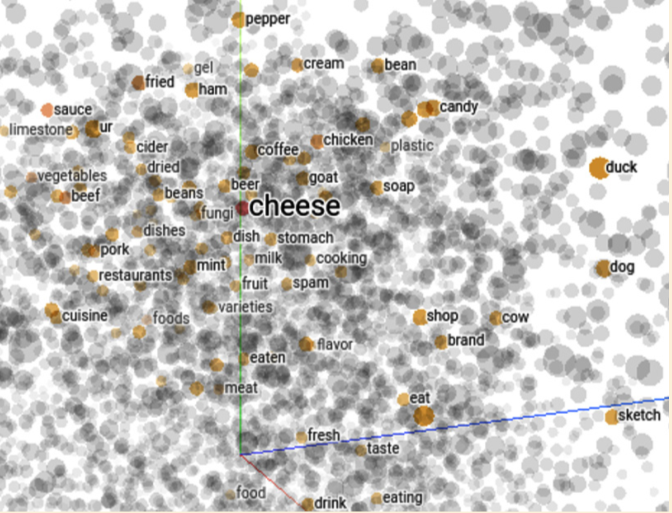

In [29]:
from IPython.display import Image
Image('images/cheese_vector.PNG')

Como podemos ver, a palavra **cheese** está semanticamente agrupada com as demais palavras sobre comida. Estas são as palavras que são usadas junto com a palavra **cheese** com bastante frequência: *sauce, cola, food*, e assim por diante. Na captura de tela a seguir, podemos ver as palavras mais próximas classificadas pela distância do cosseno (pense na distância do cosseno como uma forma de calcular a distância entre os vetores):

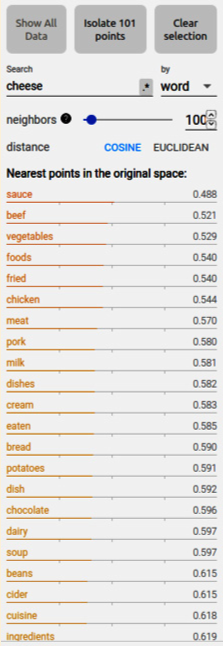

In [30]:
Image('images/cheese_points.PNG')

Que tal alguns substantivos próprios? Os vetores de palavras são treinados em um corpus enorme, como a Wikipedia, e é por isso que as representações de alguns nomes próprios também são aprendidas. Por exemplo, o nome próprio **elizabeth** é representado pelo seguinte vetor:

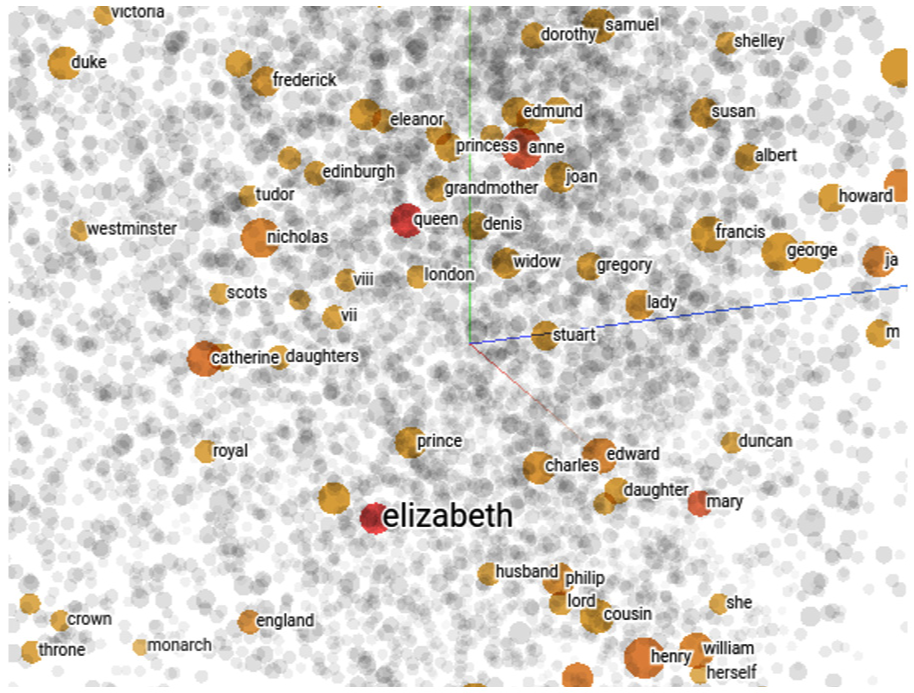

In [31]:
Image('images/elizabeth_vector.PNG')

> ### NOTA
> Observe que todas as palavras na captura de tela anterior estão em minúsculas. A maioria dos algoritmos de vetor de palavras torna todas as palavras de entrada do vocabulário em minúsculas para evitar que haja duas representações da mesma palavra.

Aqui, podemos ver que **elizabeth** de fato aponta para a rainha Elizabeth da Inglaterra. As palavras ao redor são **monarch, empress, princess, royal,lord, lady, crown, England, Tudor, Buckingham**, o nome de sua mãe, **anne**, o nome de seu pai, **henry**, e até mesmo o nome da rainha rival de sua mãe, **Catherine**! Tanto palavras comuns, como **coroa**, quanto nomes próprios, como **henry**, são agrupadas com **elizabeth**. Também podemos ver que a categoria sintática de todas as palavras vizinhas é substantivo; verbos não combinam com substantivos.

Os vetores de palavras podem capturar sinônimos, antônimos e categorias semânticas, como animais, lugares, plantas, nomes e conceitos abstratos. Em seguida, vamos mergulhar fundo na semântica e explorar um recurso surpreendente fornecido por vetores de palavras – **analogias de palavras**.

### Analogias e operações vetoriais

Já vimos que representações aprendidas podem capturar semântica. Além disso, os vetores de palavras suportam operações vetoriais, como adição e subtração de vetores, de maneira significativa. De fato, adicionar e subtrair vetores de palavras é uma maneira de apoiar analogias.

Uma analogia de palavras é uma relação semântica entre um par de palavras. Existem muitos tipos de relacionamento, como sinonímia, anonimato e relação todo-parte. Alguns exemplos de pares são (Rei – homem, Rainha – mulher), (avião – ar, navio – mar), (peixe – mar, pássaro – ar), (ramo – árvore, braço – humano), (frente – trás, ausente – presente), e assim por diante.

Por exemplo, podemos representar o mapeamento de gênero entre a Rainha e o Rei como **Rainha – Mulher** + **Homem** = **Rei**. Aqui, se subtrairmos a mulher da rainha e adicionarmos o homem, obtemos o rei. Então, essa analogia diz que a *rainha está para o rei como a mulher está para o homem*. As incorporações podem gerar analogias notáveis, como gênero, tempo e capital. O diagrama a seguir mostra essas analogias:

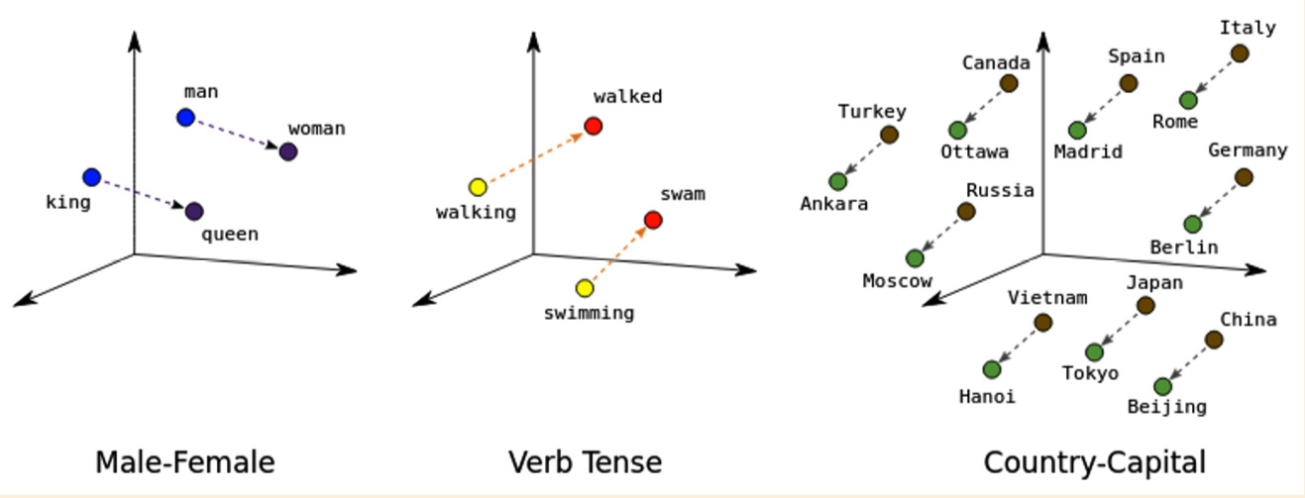

In [32]:
Image('images/analogias.PNG')

Obviamente, vetores de palavras fornecem grandes capacidades semânticas para desenvolvedores de NLP, mas como eles são produzidos? Aprenderemos mais sobre algoritmos de geração de vetores de palavras na próxima seção.

### Como os vetores de palavras são produzidos

Há mais de uma maneira de produzir vetores de palavras. Vejamos os vetores pré-treinados mais populares e como eles são treinados:
* **word2vec** é o nome do algoritmo estatístico que foi criado pelo Google para produzir vetores de palavras. Os vetores de palavras são treinados com uma arquitetura de rede neural, que processa janelas de palavras e prevê o vetor para cada palavra, dependendo das palavras ao redor. Esses vetores de palavras pré-treinados podem ser baixados em https://developer.syn.co.in/tutorial/bot/oscova/pretrained-vectors.html#word2vec-and-glove-models. Não entraremos em detalhes aqui, mas você pode ler o excelente blog em https://jalammar.github.io/illustrated-word2vec/ para obter mais detalhes sobre o algoritmo e as etapas de preparação de dados.
* **Glove Vectors** (vetores de luva) são treinados de outra maneira e foram inventados pelo grupo Stanford NLP. Este método depende da decomposição do valor singular, que é usado na matriz de co-ocorrências de palavras. Um guia completo para o algoritmo *Glove* está disponível em https://www.youtube.com/watch?v=Fn_U2OG1uqI. Os vetores pré-treinados estão disponíveis em https://nlp.stanford.edu/projects/glove/.
* **fastText** foi criado pela Facebook Research e é semelhante ao **word2vec**, mas oferece mais. word2vec prevê palavras com base em seu contexto circundante, enquanto *fastText* prevê subpalavras; ou seja, caracteres n-grams. Por exemplo, a palavra cadeira gera as seguintes subpalavras:
~~~python
ch, ha, ai, ir, cha, hai, air
~~~

fastText produz um vetor para cada subpalavra, incluindo palavras com erros ortográficos, números, palavras parciais e caracteres únicos. fastText é robusto quando se trata de palavras com erros ortográficos e palavras raras. Ele pode calcular um vetor para os tokens que não são palavras de léxico apropriadas.

A Facebook Research publicou vetores **fastText** pré-treinados para 157 idiomas. Você pode encontrar esses modelos em https://fasttext.cc/docs/en/crawl-vectors.html
Todos os algoritmos anteriores seguem a mesma ideia: palavras semelhantes ocorrem em um contexto semelhante. O contexto – as palavras ao redor de uma palavra – é a chave para gerar o vetor de palavras para uma palavra específica em qualquer caso. Todos os vetores de palavras pré-treinados que são gerados com os três algoritmos anteriores são treinados em um enorme corpus como a Wikipedia, as notícias ou o Twitter.

> ### DICA PRO
> Quando dizemos palavras semelhantes, o primeiro conceito que vem à mente é a sinonímia. Palavras sinônimas ocorrem em um contexto semelhante; por exemplo, *freedom* e *liberty* significam a mesma coisa:
> ~~~python
> We want free healthcare, education, and liberty.
> We want free healthcare, education, and freedom.
> ~~~
> Que tal antônimos? Antônimos podem ser usados no mesmo contexto. Veja o *love* e o *hate*, por exemplo:
 > ~~~python
 > I hate cats.
 > I love cats.
 > ~~~
 >
 > Como você pode ver, os antônimos também aparecem em contextos semelhantes; portanto, geralmente, seus vetores também são semelhantes. Se sua tarefa de NLP downstream for sensível nesse aspecto, tenha cuidado ao usar vetores de palavras. Nesse caso, sempre treine seus próprios vetores ou refine seus vetores de palavras treinando-os também na tarefa downstream. Você pode treinar seus próprios vetores de palavras com o pacote Gensim (https://radimrehurek.com/gensim/). A biblioteca Keras permite que vetores de palavras sejam treinados em tarefas downstream. Revisitaremos esse problema no Capítulo 8, Classificação de texto com spaCy.

Agora que sabemos mais sobre vetores de palavras, vamos ver como usar os vetores de palavras pré-treinados do spaCy.

### Usando os vetores pré-treinados do spaCy
Instalamos um modelo de linguagem spaCy inglês de tamanho médio, anteriormente, para que possamos usar vetores de palavras diretamente. Os vetores de palavras fazem parte de muitos modelos de linguagem spaCy. Por exemplo, o modelo **en_core_web_md** é fornecido com vetores de 300 dimensões para 20.000 palavras, enquanto o modelo **en_core_web_lg** é fornecido com vetores de 300 dimensões com um vocabulário de 685.000 palavras.

Normalmente, modelos pequenos (aqueles cujos nomes terminam com **sm**) não incluem nenhum vetor de palavras, mas incluem tensores sensíveis ao contexto. Você ainda pode fazer os seguintes cálculos de similaridade semântica, mas os resultados não serão tão precisos quanto os cálculos de vetores de palavras. Você pode alcançar o vetor de uma palavra através do método **token.vector**. Vejamos este método em um exemplo. O código a seguir consulta o vetor de palavras para banana:

In [33]:
import spacy
nlp = spacy.load("en_core_web_md")
doc = nlp("I ate a banana.")
doc[3].vector

array([-0.6334   ,  0.18981  , -0.53544  , -0.52658  , -0.30001  ,
        0.30559  , -0.49303  ,  0.14636  ,  0.012273 ,  0.96802  ,
        0.0040354,  0.25234  , -0.29864  , -0.014646 , -0.24905  ,
       -0.67125  , -0.053366 ,  0.59426  , -0.068034 ,  0.10315  ,
        0.66759  ,  0.024617 , -0.37548  ,  0.52557  ,  0.054449 ,
       -0.36748  , -0.28013  ,  0.090898 , -0.025687 , -0.5947   ,
       -0.24269  ,  0.28603  ,  0.686    ,  0.29737  ,  0.30422  ,
        0.69032  ,  0.042784 ,  0.023701 , -0.57165  ,  0.70581  ,
       -0.20813  , -0.03204  , -0.12494  , -0.42933  ,  0.31271  ,
        0.30352  ,  0.09421  , -0.15493  ,  0.071356 ,  0.15022  ,
       -0.41792  ,  0.066394 , -0.034546 , -0.45772  ,  0.57177  ,
       -0.82755  , -0.27885  ,  0.71801  , -0.12425  ,  0.18551  ,
        0.41342  , -0.53997  ,  0.55864  , -0.015805 , -0.1074   ,
       -0.29981  , -0.17271  ,  0.27066  ,  0.043996 ,  0.60107  ,
       -0.353    ,  0.6831   ,  0.20703  ,  0.12068  ,  0.2485

**token.vector** retorna um NumPy **ndarray**. Você pode chamar métodos **numpy** no resultado:

In [34]:
type(doc[3].vector)

numpy.ndarray

In [35]:
doc[3].vector.shape

(300,)

Neste segmento de código, primeiro, consultamos o tipo Python do vetor de palavras. Em seguida, invocamos o método **shape()** do array NumPy no vetor.

Os objetos **Doc** e **Span** também possuem vetores. O vetor de uma frase ou um intervalo é a média dos vetores de suas palavras. Execute o código a seguir e visualize os resultados:

In [36]:
doc = nlp("I like a banana,")
doc.vector
doc[1:3].vector

array([-6.05525017e-01,  1.52469993e-01, -4.58204985e-01,  1.69992447e-04,
       -1.47100016e-02,  1.31789997e-01,  3.39935005e-01, -2.97160000e-01,
        1.39290005e-01,  2.19110012e+00,  8.81455019e-02, -3.09150010e-01,
       -2.19450146e-03, -3.16514522e-02, -4.28669989e-01, -1.85343504e-01,
       -1.74284995e-01,  7.14727461e-01, -2.19054997e-01,  8.53549987e-02,
       -6.75799996e-02, -1.12599999e-01,  3.56300026e-02, -4.36179996e-01,
       -1.24247491e-01,  8.82894993e-02, -2.01919988e-01, -1.69491500e-01,
        2.01927498e-01, -3.53834987e-01, -8.82555023e-02,  1.53980002e-01,
       -2.80337989e-01, -1.50889501e-01,  7.93500245e-03,  7.34155029e-02,
        8.09445009e-02, -8.84519964e-02, -2.12325007e-01,  1.07290000e-01,
       -1.08854994e-01, -4.99175005e-02, -7.98500031e-02,  2.25370988e-01,
        1.97890013e-01, -5.27749956e-03, -1.16420999e-01,  2.36235023e-01,
       -1.14905499e-01,  8.03619996e-02, -5.17199993e-01,  2.98777997e-01,
        3.95125002e-02, -

Apenas as palavras do vocabulário do modelo possuem vetores; palavras que não estão no vocabulário são chamadas de palavras **OOV (fora do vocabulário)**. **token.is_oov** e **token.has_vector** são dois métodos que podemos usar para consultar se um token está no vocabulário do modelo e tem um vetor de palavras:

In [37]:
doc = nlp("You went there afskfsd.")
for token in doc:
	print(f"Está no Vocabulário: {token.is_oov} == | == Tem vetor de palavras: {token.has_vector}")

Está no Vocabulário: False == | == Tem vetor de palavras: True
Está no Vocabulário: False == | == Tem vetor de palavras: True
Está no Vocabulário: False == | == Tem vetor de palavras: True
Está no Vocabulário: True == | == Tem vetor de palavras: False
Está no Vocabulário: False == | == Tem vetor de palavras: True


É basicamente assim que usamos os vetores de palavras pré-treinados do spaCy. A seguir, descobriremos como invocar o método de similaridade semântica do spaCy em objetos **Doc**, **Span** e **Token**.
### O método de semelhança

No spaCy, cada objeto do tipo container tem um método de similaridade que nos permite calcular a similaridade semântica de outros objetos container comparando seus vetores de palavras.

Podemos calcular a similaridade semântica entre dois objetos contêineres, mesmo que sejam tipos de contêineres diferentes. Por exemplo, podemos comparar um objeto **Token** com um objeto **Doc** e um objeto **Doc** com um objeto **Span**. O exemplo a seguir calcula a semelhança entre dois objetos **Span**:

In [38]:
doc1 = nlp("I visited England.")
doc2 = nlp("I went to London.")
doc1[1:3].similarity(doc2[1:4])

0.5405576825141907

Podemos comparar os dois objetos **Token**, **London** e **England**, também:

In [39]:
doc1[2].similarity(doc2[3])

0.5125732421875

A similaridade da sentença é calculada chamando **similarity()** nos objetos Doc:

In [40]:
doc1.similarity(doc2)

0.8462150541090969

O segmento de código anterior calcula a semelhança semântica entre as duas frases **I visited England.** e **I went to London.**. A pontuação de similaridade é alta o suficiente para considerar ambas as sentenças semelhantes (o grau de similaridade varia de **0** a **1**, sendo **0** não relacionado e **1** idêntico).

Não surpreendentemente, o método **similarity()** retorna **1** quando você compara um objeto consigo mesmo:

In [41]:
doc1.similarity(doc1)

1.0

Julgar a distância com números às vezes é difícil, mas olhar para os vetores no papel também pode nos ajudar a entender como as palavras do nosso vocabulário são agrupadas. O trecho de código a seguir visualiza um vocabulário simples de duas classes semânticas. A primeira classe de palavras é para animais, enquanto a segunda classe é para comida. Esperamos que essas duas classes de palavras se tornem dois grupos nos gráficos:

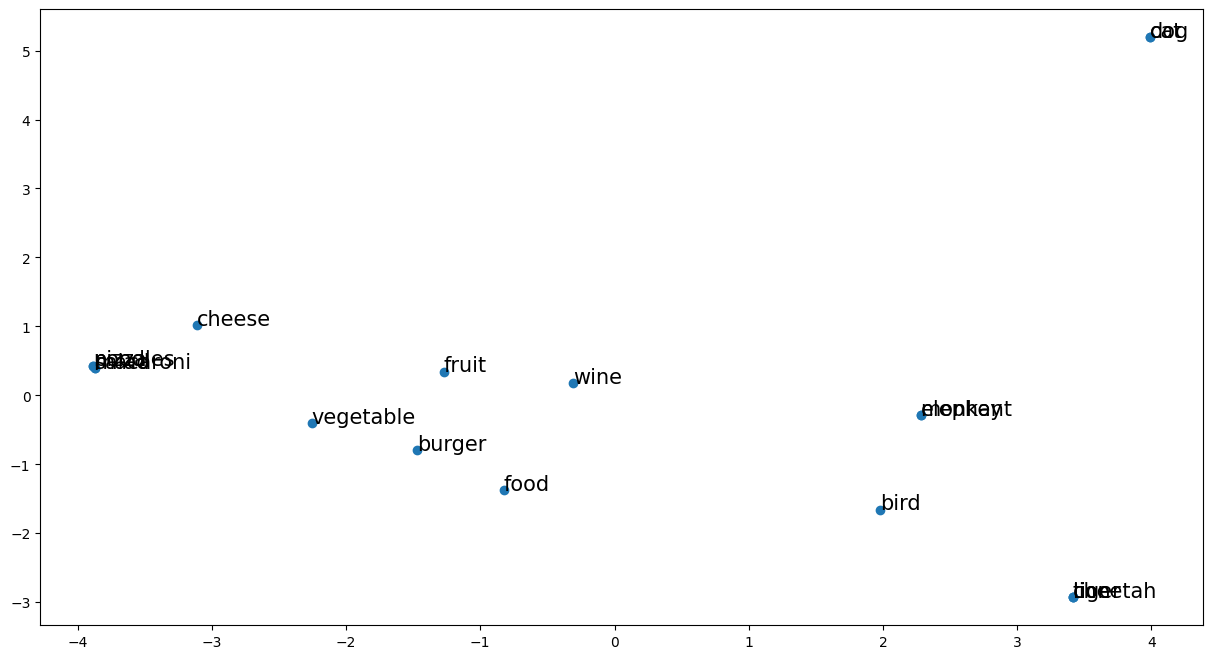

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import spacy
nlp = spacy.load("en_core_web_md")
vocab = nlp("cat dog tiger elephant bird monkey lion cheetah burger pizza food cheese wine salad noodles macaroni fruit vegetable")
words = [word.text for word in vocab]

vecs = np.vstack([word.vector for word in vocab if word.has_vector])
pca = PCA(n_components=2)
vecs_transformed = pca.fit_transform(vecs)
plt.figure(figsize=(15,8))
plt.scatter(vecs_transformed[:,0], vecs_transformed[:,1])
for word, coord in zip(words, vecs_transformed):
	x,y = coord
	plt.text(x,y,word, size=15)
plt.show()

Este trecho de código consegue muito. Vamos dar uma olhada:
1. Primeiro, importamos a biblioteca matplotlib para criar nosso gráfico.
2. As próximas duas importações são para calcular os vetores.
3. Importamos o **spacy** e criamos um objeto **nlp** como de costume.
4. Em seguida, criamos um objeto **Doc** a partir de nosso vocabulário.
5. Em seguida, empilhamos nossos vetores de palavras verticalmente chamando **np.vstack**.
6. Como os vetores são 300-dimensional, precisamos projetá-los em um espaço bidimensional para fins de visualização. Fizemos essa projeção extraindo os dois componentes principais por meio da **análise de componentes principais (PCA)**.
7. O resto do código lida com chamadas de função matplotlib para criar um gráfico de dispersão.

Nossos vetores de palavras espaciais realmente funcionaram! Aqui podemos ver as duas classes semânticas que foram agrupadas na visualização. Observe que a distância entre os animais é menor e mais uniformemente distribuída, enquanto a classe alimentar formou grupos dentro do grupo.

Anteriormente, mencionamos que podemos criar nossos próprios vetores de palavras ou refiná-los em nosso próprio corpus. Depois de fazer isso, podemos usá-los no spaCy? A resposta é sim! Na próxima seção, aprenderemos como carregar vetores de palavras personalizados no spaCy.

## Usando vetores de palavras de terceiros
Também podemos usar vetores de palavras de terceiros no spaCy. Nesta seção, aprenderemos como importar um pacote de vetores de palavras de terceiros para o spaCy. Usaremos os vetores pré-treinados baseados em subpalavras do fastText da IA do Facebook. Você pode ver a lista de todos os vetores pré-treinados em inglês disponíveis em https://fasttext.cc/docs/en/english-vectors.html.

O nome do pacote identifica a dimensão do vetor, o tamanho do vocabulário e o gênero do corpus no qual os vetores serão treinados. Por exemplo, **wiki-news-300d-1M-subword.vec.zip** indica que contém 1 milhão de vetores de palavras de 300 dimensões que foram treinados em um corpus da Wikipedia. Vamos começar a baixar os vetores:
1. Em seu terminal, digite o seguinte comando. Alternativamente, você pode copiar e colar o URL no seu navegador e o download deve começar:
   ~~~python
    $ wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
   ~~~
    A linha anterior fará o download dos vetores de palavras de 300 dimensões em sua máquina.

2. Em seguida, descompactaremos o seguinte arquivo **.zip**. Você pode descompactá-lo clicando com o botão direito do mouse ou usando o seguinte código:
~~~python
$ unzip wiki-news-300d-1M-subword.vec.zip
~~~
Após descompactar este arquivo, você deverá ver o arquivo **wiki-news-300d-1M-subword.vec**.

3. Agora, estamos prontos para usar o comando init-model do spaCy:
~~~python
$ python -m spacy init-model en en_subwords_wiki_lg --vectors-loc wiki-news-300d-1M-subword.vec
~~~


Este comando executa as seguintes ações:
  * Converte os vetores **wiki-news-300d-1M-subword.vec** no formato vetorial do spaCy.
  * Cria um diretório de modelo de idioma chamado **en_subwords_wiki_lg** que contém os vetores recém-criados.
4. Se tudo correr bem, você deverá ver a seguinte mensagem:
~~~python
Reading vectors from wiki-news-300d-1M-subword.vec
Open loc
999994it [02:05, 7968.84it/s]
Creating model...
0it [00:00, ?it/s] Successfully compiled vocab
999731 entries, 999994 vectors
~~~

5. Com isso, criamos o modelo de linguagem. Agora, podemos carregá-lo:
~~~python
import spacy
nlp = spacy.load("en_subwords_wiki_lg")
~~~

6. Agora, podemos criar um objeto **doc** com este objeto **nlp**, assim como fizemos com os modelos de linguagem padrão do spaCy:
~~~python
doc = nlp("I went there.")
~~~
O modelo que acabamos de criar é um modelo vazio que foi iniciado com a palavra vetores, portanto, não contém nenhum outro componente do pipeline. Por exemplo, fazer uma chamada para **doc.ents** falhará com um erro. Portanto, tenha cuidado ao trabalhar com vetores de terceiros e prefira vetores spaCy integrados sempre que possível.

## Métodos avançados de similaridade semântica
Nesta seção, descobriremos métodos avançados de similaridade semântica para similaridade de palavras, frases e sentenças. Já aprendemos a calcular a similaridade semântica com o método de **similaridade** do spaCy e obtivemos algumas pontuações. Mas o que essas pontuações significam? Como são calculados?

Antes de examinarmos métodos mais avançados, primeiro, aprenderemos como a similaridade semântica é calculada.

### Entendendo a semelhança semântica
Quando coletamos dados de texto (qualquer tipo de dados), queremos ver como alguns exemplos são semelhantes, diferentes ou relacionados. Queremos medir a semelhança entre duas partes de texto calculando suas pontuações de similaridade. Aqui, o termo similaridade semântica entra em cena; **similaridade semântica** é uma **métrica** que é definida sobre textos, onde a distância entre dois textos é baseada em sua semântica.

Uma métrica em matemática é basicamente uma função de distância. Cada métrica induz uma topologia no espaço vetorial. Vetores de palavras são vetores, então queremos calcular a distância entre eles e usar isso como uma pontuação de similaridade.

Agora, vamos aprender sobre duas funções de distância comumente usadas: **distância euclidiana** e **distância cosseno**. Vamos começar com a distância euclidiana.
#### Distância Euclidiana
A distância euclidiana entre dois pontos em um espaço k-dimensional é o comprimento do caminho entre eles. A distância entre dois pontos é calculada pelo teorema de Pitágoras. Calculamos essa distância somando a diferença do quadrado de cada coordenada e depois tirando a raiz quadrada dessa soma. O diagrama a seguir mostra a distância euclidiana entre dois vetores, cão e gato:

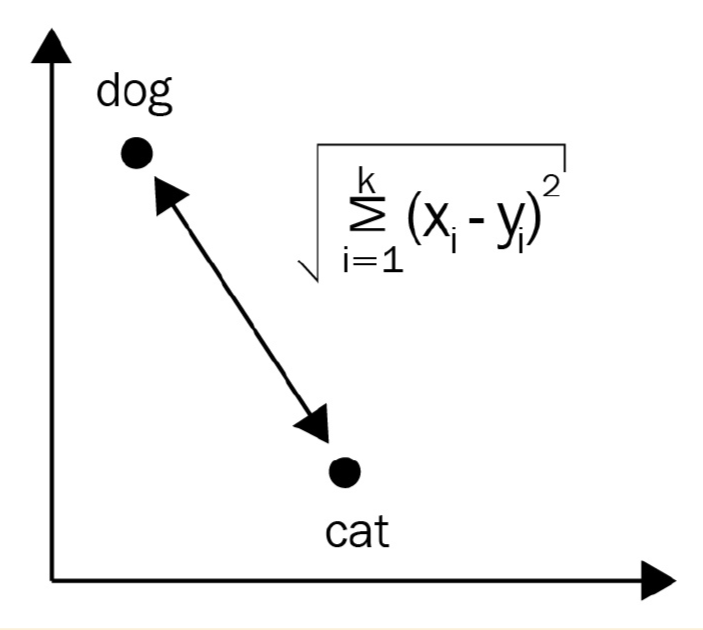

In [43]:
Image("images/distance_euclidian.PNG")

O que significa distância euclidiana para vetores de palavras? Primeiro, a distância euclidiana não tem idéia de **orientação vetorial**; o que importa é a **magnitude do vetor**. Se pegarmos uma caneta e desenharmos um vetor da origem até um ponto do cachorro (vamos chamá-lo de **vetor do cachorro**) e fizermos o mesmo para o ponto do **gato** (vamos chamá-lo de **vetor do gato**) e subtrairmos um vetor do outro, então a distância é basicamente a magnitude desse vetor de diferença.

O que acontece se adicionarmos mais duas palavras semanticamente semelhantes (*canine, terrier*) a **dog** e fizermos disso um texto de três palavras? Obviamente, o vetor cão agora crescerá em magnitude, possivelmente na mesma direção. Desta vez, a distância será muito maior devido à geometria (como mostrado no diagrama a seguir), embora a semântica do primeiro pedaço de texto (agora **cão canino terrier**) permaneça a mesma.

Esta é a principal desvantagem do uso da distância euclidiana para similaridade semântica – a orientação dos dois vetores no espaço não é levada em consideração. O diagrama a seguir ilustra a distância entre **cão** e **gato** e a distância entre **cão canino terrier** e **gato**:

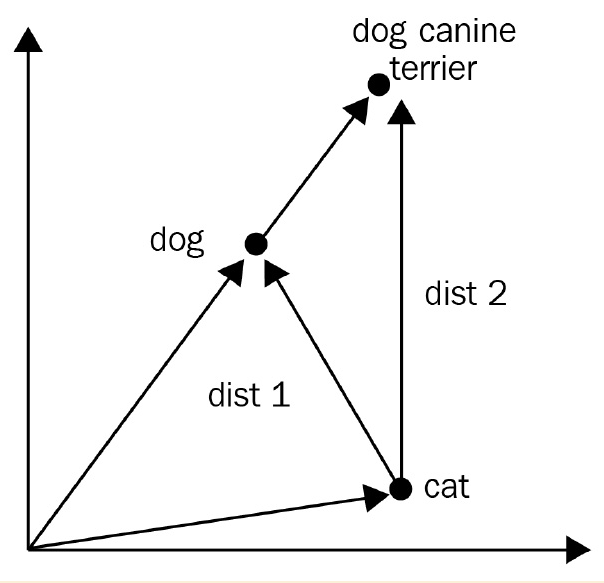

In [45]:
Image('images/distance_cat_dog.PNG')

Como podemos corrigir esse problema? Há outra maneira de calcular a similaridade que resolve esse problema, chamada **similaridade de cosseno**. Vamos dar uma olhada.

### Distância do cosseno e similaridade do cosseno
Ao contrário da distância euclidiana, a distância do cosseno está mais preocupada com a orientação dos dois vetores no espaço. A semelhança de cosseno de dois vetores é basicamente o cosseno do ângulo criado por esses dois vetores. O diagrama a seguir mostra o ângulo entre os vetores **cão** e **gato**:

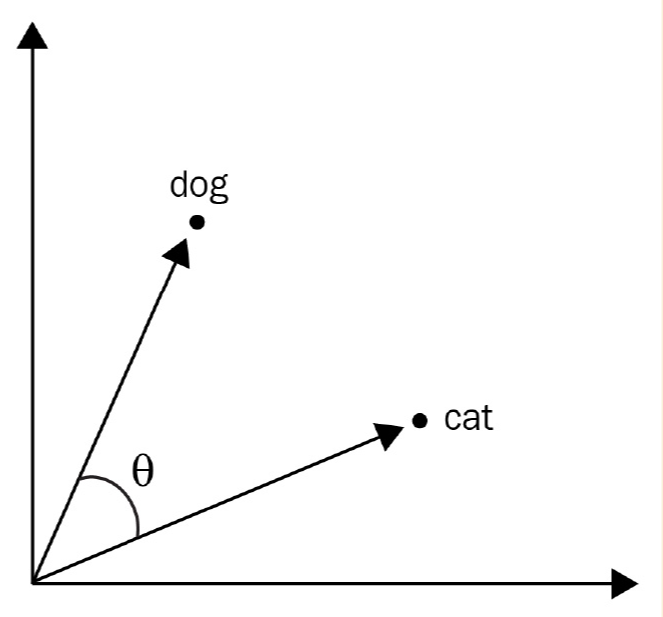

In [46]:
Image("images/similarity_cosene.PNG")

A pontuação máxima de similaridade permitida pela similaridade de cosseno é **1**. Isso é obtido quando o ângulo entre dois vetores é 0 graus (portanto, os vetores coincidem). A semelhança entre dois vetores é 0 quando o ângulo entre eles é de 90 graus.

A similaridade de cosseno nos fornece escalabilidade quando os vetores crescem em magnitude. Vamos nos referir à Figura anterior novamente aqui. Se crescermos um dos vetores de entrada, o ângulo entre eles permanece o mesmo, então a pontuação de similaridade do cosseno é a mesma.

Observe que aqui estamos calculando a pontuação de similaridade semântica, não a distância. O valor mais alto possível é 1 quando os vetores coincidem, enquanto a pontuação mais baixa é 0 quando dois vetores são perpendiculares. A distância cosseno é 1 – cos(θ), que é uma função de distância.

*spaCy* usa similaridade de cosseno para calcular similaridade semântica. Portanto, chamar o método de **similaridade** nos ajuda a fazer cálculos de similaridade de cosseno.

Até agora, aprendemos como calcular pontuações de similaridade, mas ainda não descobrimos palavras nas quais devemos procurar significado. Obviamente, nem todas as palavras em uma frase têm o mesmo impacto na semântica da frase.

O método de similaridade calculará a pontuação de similaridade semântica para nós, mas para que os resultados desse cálculo sejam úteis, precisamos escolher as palavras-chave certas para comparar. Para entender o porquê, considere o seguinte trecho de texto:

~~~python
Blue whales are the biggest mammals in the world. They're observed in California coast during spring.
~~~
Se estivermos interessados em encontrar os maiores mamíferos do planeta, as frases **biggest mammals** e **in the world** serão as palavras-chave. Comparar essas frases com as frases de busca dos *largest mammals* e *on the planet* deve nos dar uma alta pontuação de similaridade. Mas se estivermos interessados em conhecer alguns lugares do mundo, **Califórnia** será a palavra-chave. **Califórnia** é semanticamente semelhante à palavra *geography* e, melhor ainda, o tipo de entidade é um substantivo geográfico.

Já aprendemos *como* calcular a pontuação de similaridade. Na próxima seção, aprenderemos sobre *onde* procurar o *significado*. Extrairemos as frases-chave e entidades nomeadas das frases e as usaremos nos cálculos de pontuação de similaridade. Começaremos abordando um estudo de caso sobre categorização de texto antes de melhorar os resultados da tarefa por meio da extração de frases-chave.

### Categorizando texto com semelhança semântica
 Determinar a semelhança semântica de duas frases pode ajudá-lo a categorizar textos em categorias predefinidas ou identificar apenas os textos relevantes. Neste estudo de caso, filtraremos todos os comentários de usuários em um site de comércio eletrônico relacionados à palavra *perfum*. Suponha que você precise avaliar os seguintes comentários de usuários:
 ~~~python
 I purchased a science fiction book last week.
I loved everything related to this fragrance: light, floral and feminine …
I purchased a bottle of wine.
~~~
Aqui, podemos ver que apenas a segunda frase está relacionada. Isso porque contém a palavra **fragrance**, bem como os adjetivos que descrevem os aromas. Para entender quais frases estão relacionadas, podemos tentar várias estratégias de comparação.

Primeiro, podemos comparar o **perfume** a cada frase. Lembre-se de que spaCy gera um vetor de palavras para uma frase calculando a média do vetor de palavras de seus tokens. O trecho de código a seguir compara as frases anteriores com a chave de pesquisa do **perfume**:

In [49]:
sentences = nlp("I purchased a science fiction book last week. I loved everything related to this fragrance: light, floral and feminine... I purchased a bottle of wine. ")
key = nlp("perfume")
for sent in sentences.sents:
	print(sent.similarity(key))

0.22991573527875686
0.35766555848152704
0.29669380269391266


Aqui, realizamos os seguintes passos:
1. Primeiro, criamos um objeto **Doc** com as três frases anteriores.
2. Em seguida, para cada frase, calculamos o escore de similaridade com o **perfume**.
3. Em seguida, imprimimos a pontuação invocando o método **similarity()** na sentença.

O grau de semelhança entre **perfume** e a primeira frase é pequeno, indicando que esta frase não é muito relevante para nossa chave de busca. A segunda frase parece relevante, o que significa que identificamos corretamente a semelhança semântica.

E a terceira frase? O roteiro identificou que a terceira frase é relevante de alguma forma, muito provavelmente porque inclui a palavra **bottle** e os perfumes são vendidos em **bottle**. A palavra **bottle** aparece em contextos semelhantes com a palavra **perfume**. Por esta razão, a pontuação de similaridade desta frase e a chave de busca não é baixa o suficiente; também, as pontuações da segunda frase e da terceira frase não estão longe o suficiente para tornar a segunda frase significativa.

Há outro problema potencial em comparar a chave com a frase inteira. Na prática, ocasionalmente lidamos com textos bastante longos, como documentos da web. A média de um texto muito longo diminui a importância das palavras-chave. Para melhorar o desempenho, podemos extrair as palavras importantes. Vejamos como podemos identificar as frases-chave em uma frase.

### Extraindo frases-chave
Uma maneira melhor de fazer a categorização semântica é extrair as palavras/frases importantes e compará-las apenas com a chave de pesquisa. Em vez de comparar a chave com as diferentes partes do discurso, podemos comparar a chave apenas com as frases nominais. Frases nominais são os sujeitos, objetos diretos e objetos indiretos das frases e carregam uma grande porcentagem da semântica da frase em seus ombros.

Por exemplo, na frase *Blue whales live in California.*, você provavelmente gostaria de se concentrar em *blue whales, whales, California* ou *whales in California*.

Da mesma forma, na frase anterior sobre perfume, nos concentramos em escolher o substantivo, *fragrance*. Em diferentes tarefas semânticas, você pode precisar de outras palavras de contexto, como verbos, para decidir sobre o que é a frase, mas para semelhança semântica, as frases nominais têm mais peso.

O que é um sintagma nominal, então? Um **sintagma nominal (NP)** é um grupo de palavras que consiste em um substantivo e seus modificadores. Os modificadores são geralmente pronomes, adjetivos e determinantes. As seguintes frases são frases nominais:
~~~python
A dog
My dog
My beautiful dog
A beautiful dog
A beautiful and happy dog
My happy and cute dog
~~~
*spaCy* extrai frases nominais analisando a saída do analisador de dependência. Podemos ver as frases nominais de uma frase usando o método **doc.noun_chunks**:

In [51]:
doc = nlp("My beautiful and cute dog jumped over the fence")
doc.noun_chunks

In [52]:
list(doc.noun_chunks)

[My beautiful and cute dog, the fence]

Vamos modificar um pouco o trecho de código anterior. Em vez de comparar o *perfume* da chave de busca com a frase inteira, desta vez, vamos compará-lo apenas com os pedaços nominais da frase:

In [54]:
for sent in sentences.sents:
    nchunks = [nchunk.text for nchunk in sent.noun_chunks]
    nchunk_doc = nlp(" ".join(nchunks))
    print(nchunk_doc.similarity(key))

0.18878097454174125
0.5653207448179431
0.3194876559625115


No código anterior, fizemos o seguinte:
1. Primeiro, iteramos as frases.
2. Em seguida, para cada frase, extraímos os pedaços de substantivos e os armazenamos em uma lista Python.
3. Em seguida, juntamos os pedaços de substantivos da lista em uma *string* Python e a convertemos em um objeto **Doc**.
4. Finalmente, comparamos este objeto **Doc** de *noun chunks* com a chave de busca perfume para determinar sua pontuação de similaridade semântica.

Se compararmos essas pontuações com as pontuações anteriores, veremos que a primeira frase ainda é irrelevante, então sua pontuação caiu um pouco. A pontuação da segunda frase aumentou significativamente. Agora, as pontuações da segunda frase e da terceira frase parecem tão distantes uma da outra que podemos dizer com confiança que a segunda frase é a frase mais relacionada aqui.

### Extraindo e comparando entidades nomeadas

Em alguns casos, em vez de extrair todos os substantivos, focaremos apenas nos nomes próprios; portanto, queremos extrair as entidades nomeadas. Digamos que queremos comparar os seguintes parágrafos:
~~~python
"Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries every day."
"Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world."
"The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world."
~~~
Nosso código deve ser capaz de reconhecer que os dois primeiros parágrafos são sobre grandes empresas de tecnologia e seus produtos, enquanto o terceiro parágrafo é sobre uma localização geográfica.

Comparar todas as frases nominais nessas frases pode não ser muito útil porque muitas delas, como **volume**, não são relevantes para a categorização. Os tópicos desses parágrafos são determinados pelas frases dentro deles; ou seja, **Google Search, Google, Microsoft Bing, Microsoft, Windows, Dead Sea, Jordan Valley** e **Israel**. *spaCy* pode identificar essas entidades:

In [55]:
doc1 = nlp("Google Search, often referred as Google, is the most popular search engine nowadays. It answers a huge volume of queries every day.")
doc2 = nlp("Microsoft Bing is another popular search engine. Microsoft is known by its star product Microsoft Windows, a popular operating system sold over the world.")
doc3 = nlp("The Dead Sea is the lowest lake in the world, located in the Jordan Valley of Israel. It is also the saltiest lake in the world.")
doc1.ents

(Google Search, Google, every day)

In [56]:
doc2.ents

(Microsoft Bing, Microsoft, Microsoft, Windows)

In [58]:
doc3.ents

(The Dead Sea, the Jordan Valley, Israel)

Agora que extraímos as palavras que queremos comparar, vamos calcular as pontuações de similaridade:

In [59]:
ents1 = [ent.text for ent in doc1.ents]
ents2 = [ent.text for ent in doc2.ents]
ents3 = [ent.text for ent in doc3.ents]
ents1 = nlp(" ".join(ents1))
ents2 = nlp(" ".join(ents2))
ents3 = nlp(" ".join(ents3))
ents1.similarity(ents2)

0.5045524172193131

In [60]:
ents1.similarity(ents3)

0.46478306056211016

In [61]:
ents2.similarity(ents3)

0.26571558602381207

Observando esses números, podemos ver que o nível mais alto de semelhança existe entre o primeiro e o segundo parágrafo, ambos sobre grandes empresas de tecnologia. O terceiro parágrafo não é muito semelhante aos outros parágrafos. Como conseguimos esse cálculo usando apenas vetores de palavras? Provavelmente porque as palavras Google e Microsoft geralmente aparecem juntas em notícias e outros corpus de texto de mídia social, criando vetores de palavras semelhantes.

Parabéns! Você chegou ao final da seção *Métodos avançados de similaridade semântica*! Você explorou diferentes maneiras de combinar vetores de palavras com recursos linguísticos, como frases-chave e entidades nomeadas. Ao terminar esta seção, estamos agora prontos para concluir este capítulo.